In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def show_images_subplots(images, titles=None, cols=5, cmap='gray', figsize=(15, 10)):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap=cmap)
        if titles:
            plt.title(titles[i], fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
fingerprint_dataset_path = r'E:\DeepLearning\ImageProcessing\project2\Dataset01\SOCOFing\Real' 
footprint_dataset_path = r'E:\DeepLearning\ImageProcessing\project2\Dataset02\Dactyloscopic\Left'

In [7]:
# Number of images
num_images = 10

# Load images
images = []
image_titles = []

# Process fingerprints (1 to 5)
fingerprint_files = os.listdir(fingerprint_dataset_path)[:5]
for img_file in fingerprint_files:
    img_path = os.path.join(fingerprint_dataset_path, img_file)
    # Convert image to Grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    images.append(img)
    image_titles.append(f'Fingerprint: {img_file}')

# Process footprints (6 to 10)
footprint_files = os.listdir(footprint_dataset_path)[:5]
for img_file in footprint_files:
    img_path = os.path.join(footprint_dataset_path, img_file)
    # Convert image to Grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    images.append(img)
    image_titles.append(f'Footprint: {img_file}')

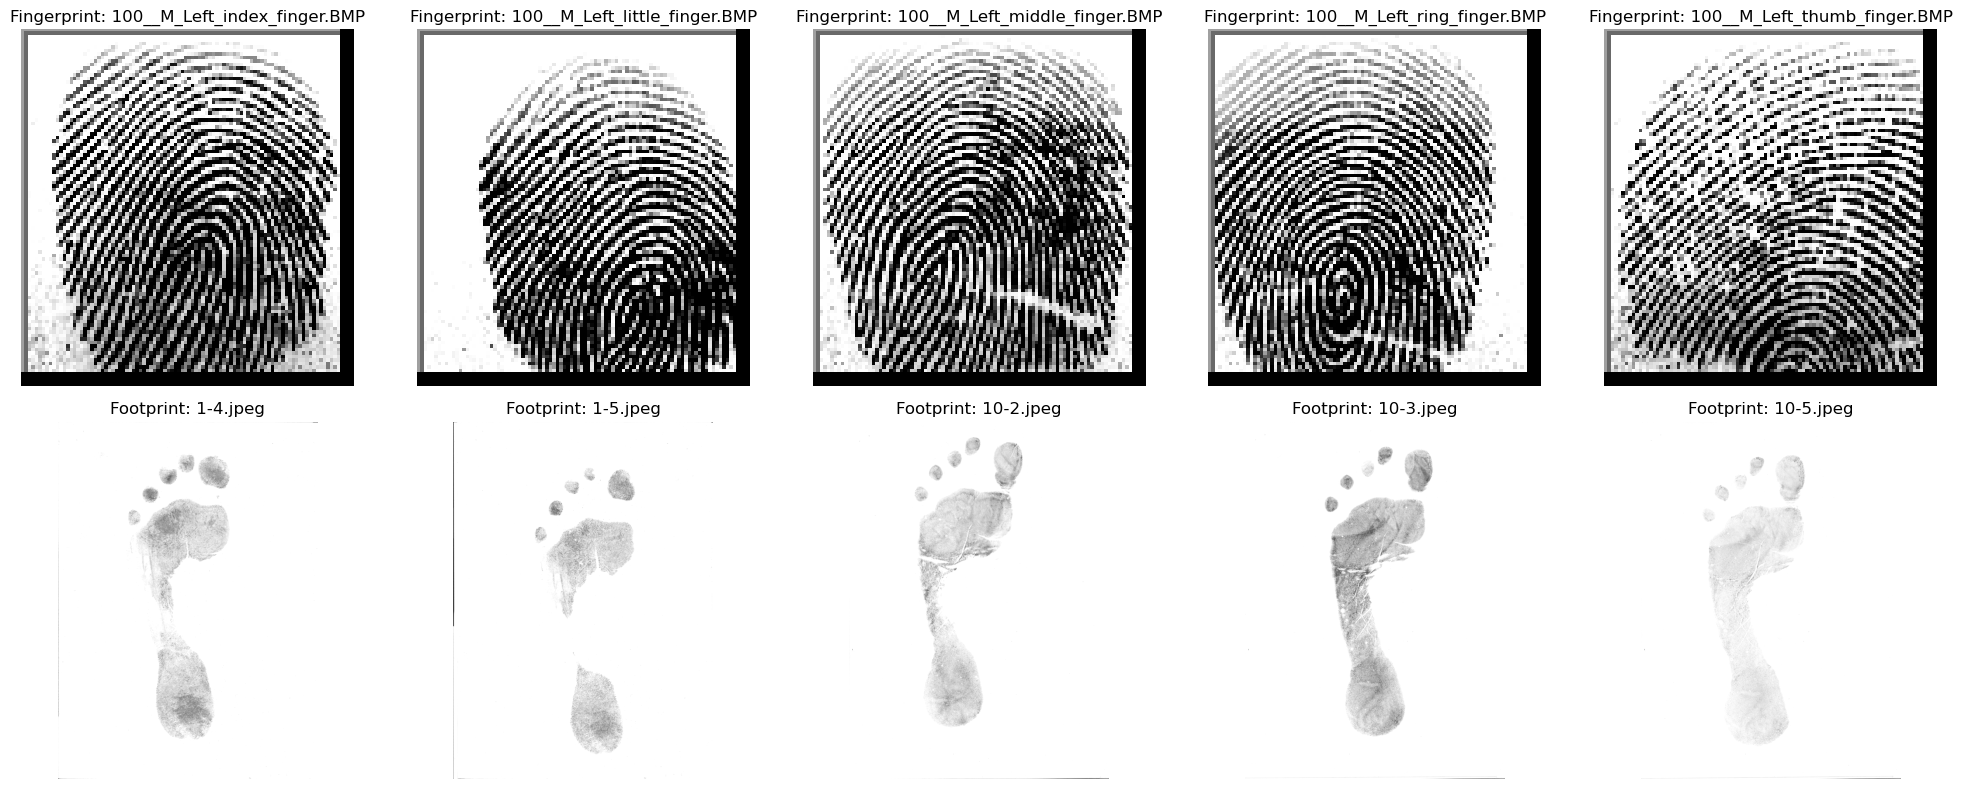

In [15]:
def show_images_subplots(images, titles, cols=5):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(20, rows * 4))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
show_images_subplots(images, titles=image_titles, cols=5)

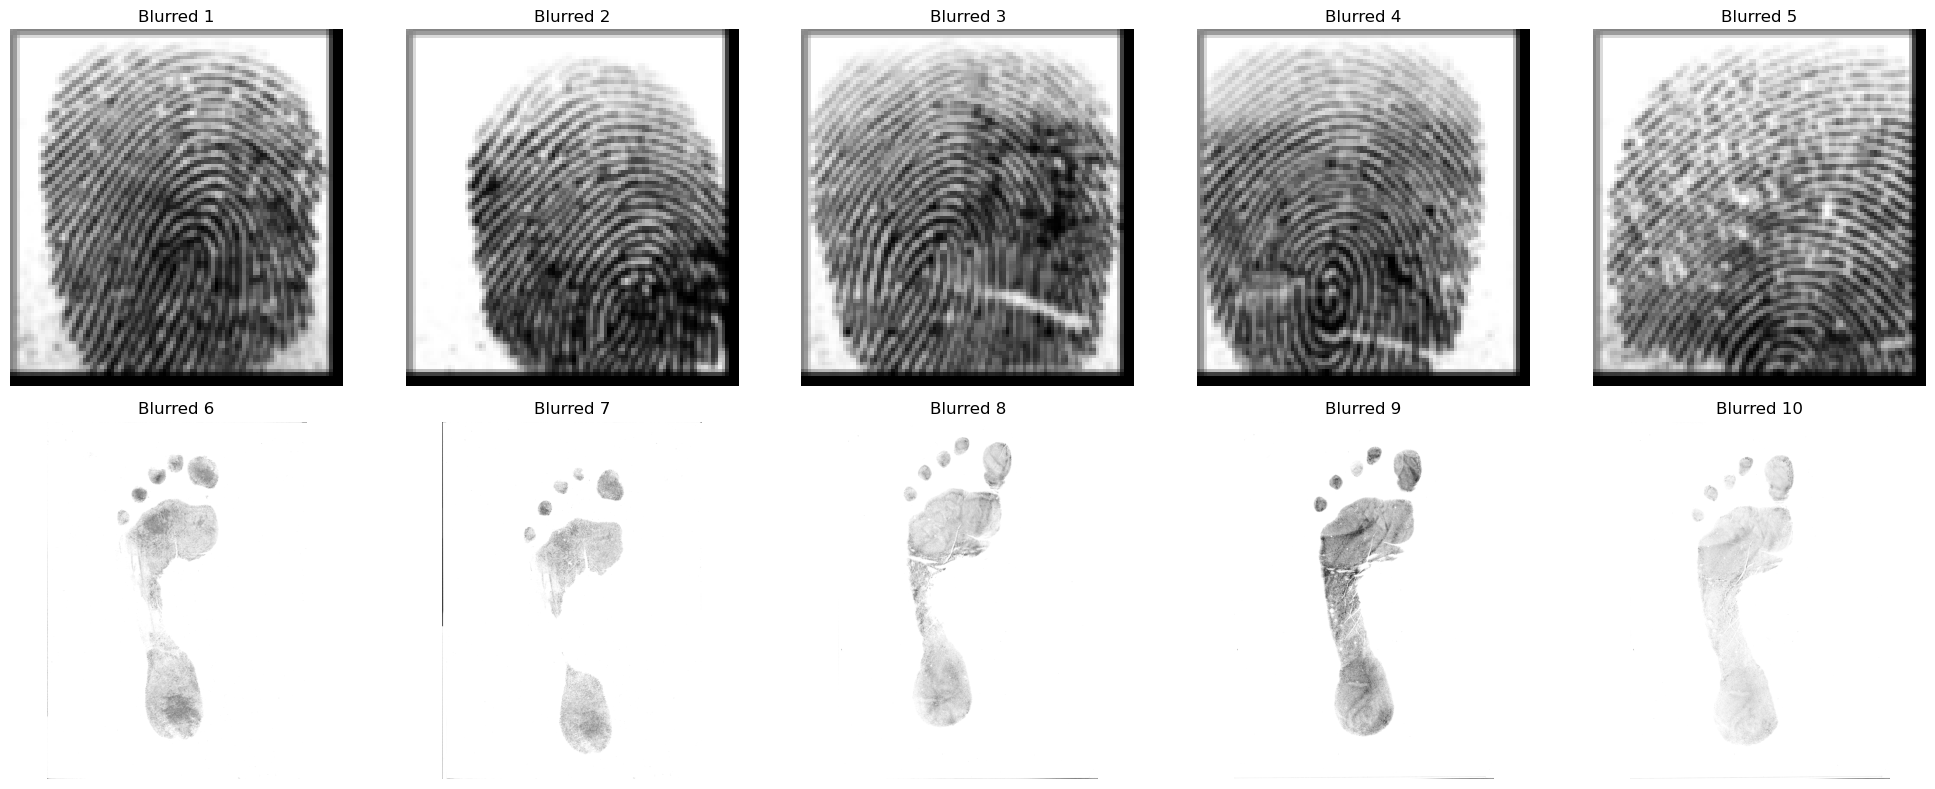

In [17]:
blurred_images = [cv2.GaussianBlur(img, (3, 3), 0) for img in images]
show_images_subplots(blurred_images, titles=[f"Blurred {i+1}" for i in range(len(blurred_images))])

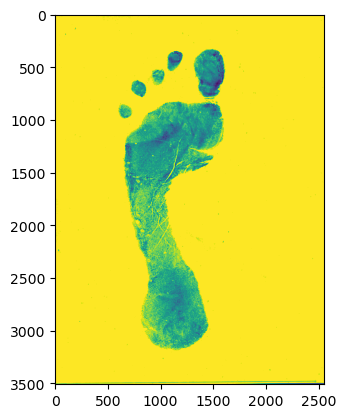

In [59]:
gamma = 10
gamma_corrected_image = np.array(255* (img/255)**gamma, dtype='uint8')
plt.imshow(gamma_corrected_image)


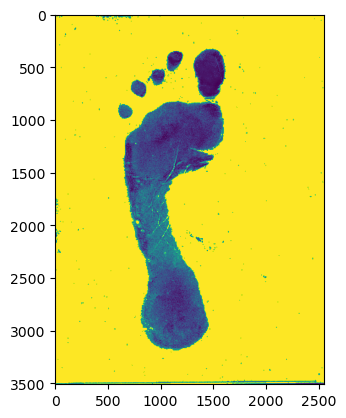

In [69]:
equalized_image = cv2.equalizeHist(img)
plt.imshow(equalized_image)


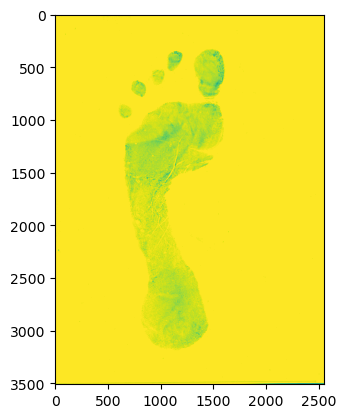

In [111]:
alpha = 0.25
beta = 5

adjust_image = cv2.convertScaleAbs(img, alpha = alpha, beta = beta)
plt.imshow(adjust_image)

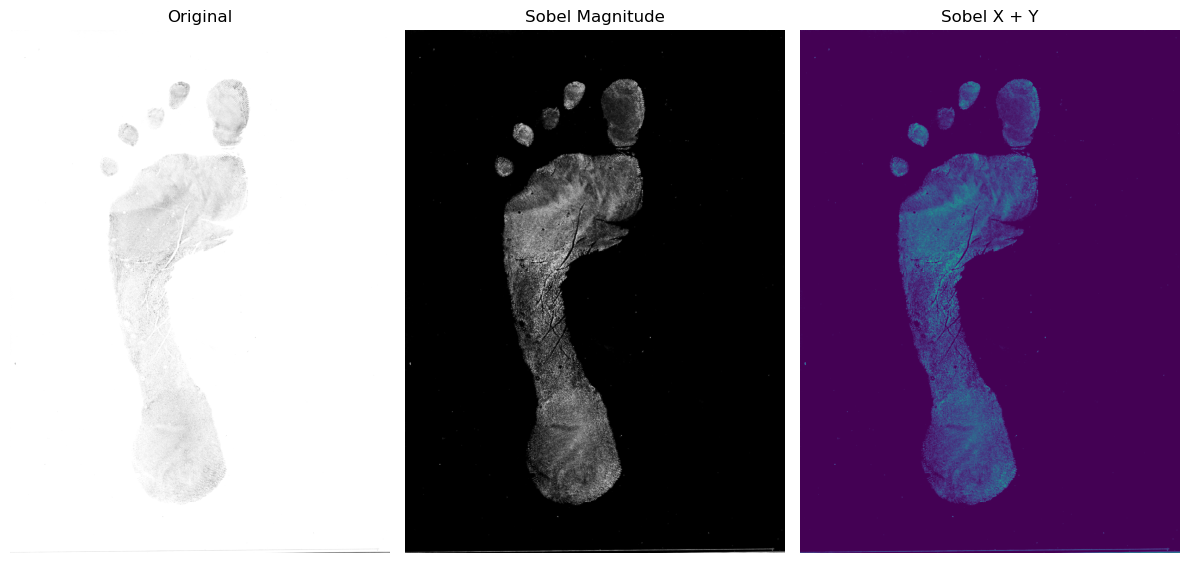

In [115]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Gx
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Gy

magnitude = np.sqrt(sobelx**2 + sobely**2)
magnitude = np.uint8(np.clip(magnitude, 0, 255)) 

magnitude_display = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.title('Original'), plt.imshow(img, cmap='gray'), plt.axis('off')
plt.subplot(1, 3, 2), plt.title('Sobel Magnitude'), plt.imshow(magnitude_display, cmap='gray'), plt.axis('off')
plt.subplot(1, 3, 3), plt.title('Sobel X + Y'), plt.imshow(cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5,
                                                                          cv2.convertScaleAbs(sobely), 0.5, 0)), plt.axis('off')
plt.tight_layout()
plt.show()

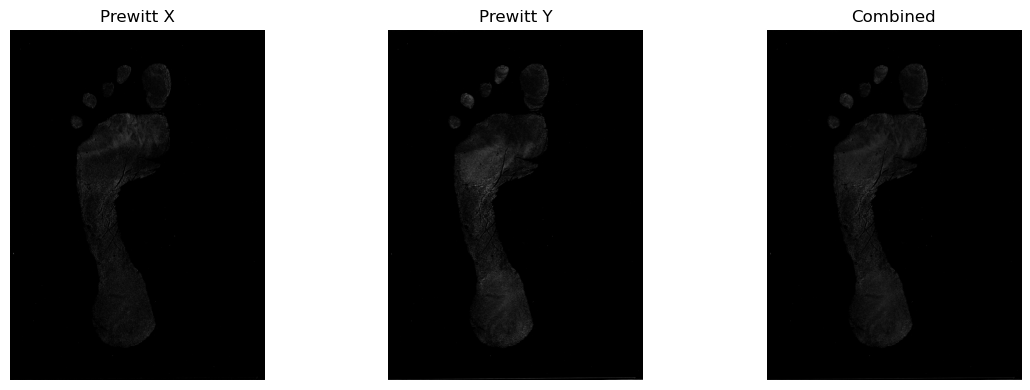

In [117]:
kernelx = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]], dtype=np.float32)

kernely = np.array([[-1, -1, -1],
                    [ 0,  0,  0],
                    [ 1,  1,  1]], dtype=np.float32)

prewittx = cv2.filter2D(img, -1, kernelx)
prewitty = cv2.filter2D(img, -1, kernely)

prewitt_combined = cv2.addWeighted(prewittx, 0.5, prewitty, 0.5, 0)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1), plt.imshow(prewittx, cmap='gray'), plt.title('Prewitt X'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(prewitty, cmap='gray'), plt.title('Prewitt Y'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(prewitt_combined, cmap='gray'), plt.title('Combined'), plt.axis('off')
plt.tight_layout()
plt.show()

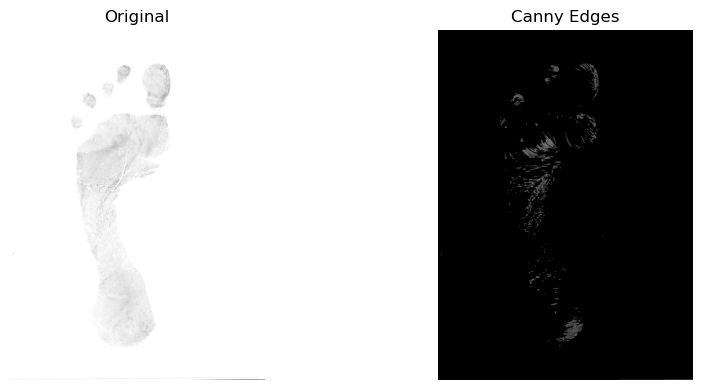

In [119]:
blurred = cv2.GaussianBlur(img, (5, 5), 1.4)

edges = cv2.Canny(blurred, threshold1=50, threshold2=150)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges'), plt.axis('off')
plt.tight_layout()
plt.show()

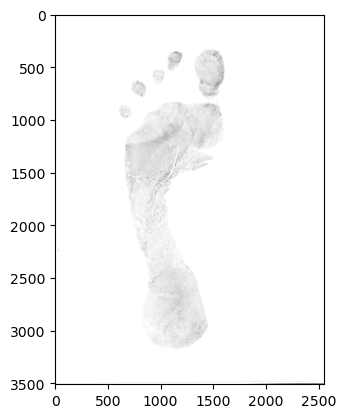

In [125]:
blurred_img = cv2.GaussianBlur(img, (3, 3), 0)
plt.imshow(blurred_img, cmap='gray')

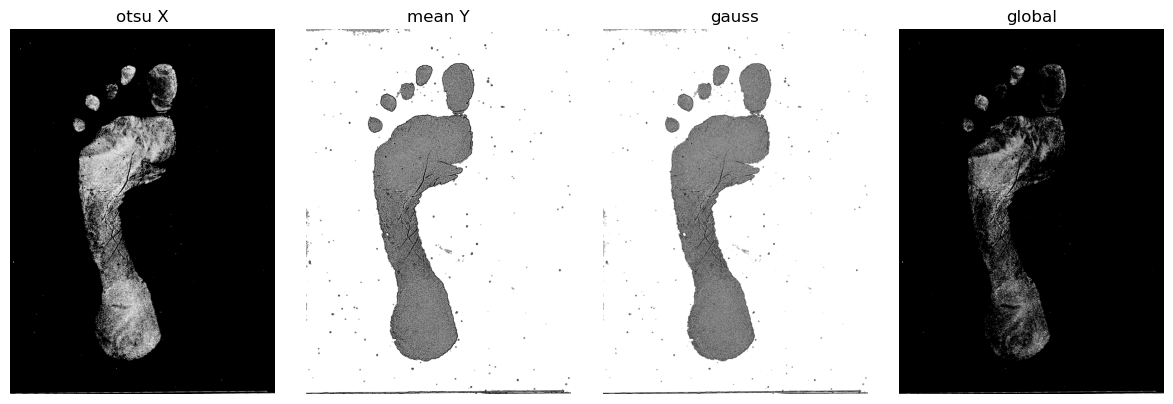

In [147]:
otsu = cv2.threshold(magnitude_display, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
adaptive_mean = cv2.adaptiveThreshold(magnitude_display, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
adap_gauss = cv2.adaptiveThreshold(magnitude_display, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
global_thresh = cv2.threshold(magnitude_display, 127, 255, cv2.THRESH_BINARY)[1]


#plt.imshow(otsu)
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1), plt.imshow(otsu, cmap='gray'), plt.title('otsu X'), plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(adaptive_mean, cmap='gray'), plt.title('mean Y'), plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(adap_gauss, cmap='gray'), plt.title('gauss'), plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(global_thresh, cmap='gray'), plt.title('global'), plt.axis('off')

plt.tight_layout()
plt.show()

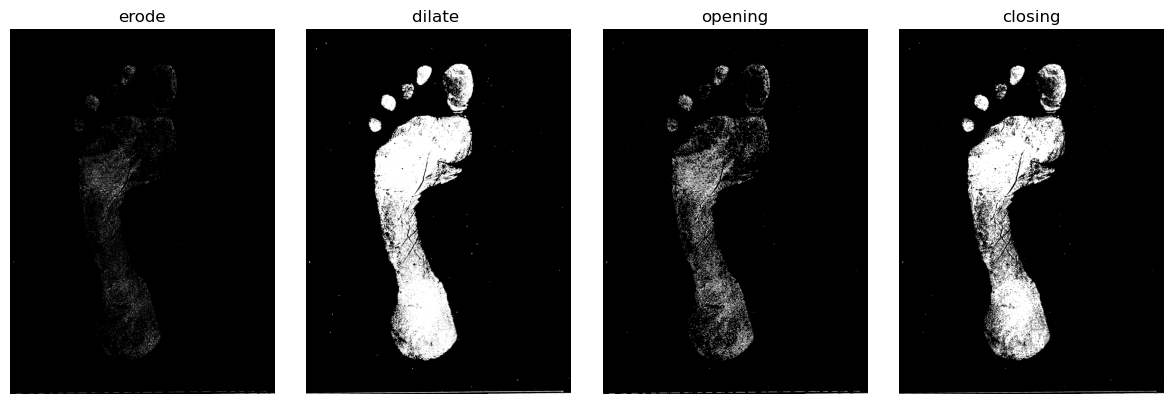

In [153]:
kernel = np.ones((3, 3), np.uint8)
erode = cv2.erode(otsu, kernel, iterations=1)
dilate = cv2.dilate(otsu, kernel, iterations=1)
opening = cv2.morphologyEx(otsu, cv2.MORPH_OPEN, kernel, iterations=1) #iterations optional parameter
closing = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel, ) #iterations optional parameter
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1), plt.imshow(erode, cmap='gray'), plt.title('erode'), plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(dilate, cmap='gray'), plt.title('dilate '), plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(opening, cmap='gray'), plt.title('opening'), plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(closing, cmap='gray'), plt.title('closing'), plt.axis('off')

plt.tight_layout()
plt.show()

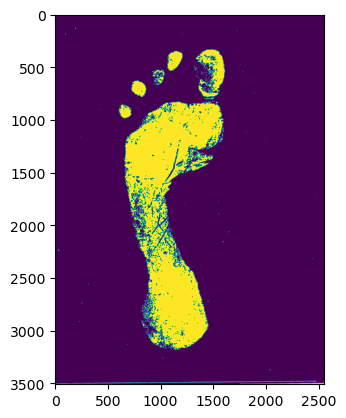

In [157]:

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closing = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)